   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Missing values per column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


C:\Users\Paras\AppData\Local\Temp\ipykernel_20696\2526137304.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(0, np.nan, inplace=True)
C:\Users\Paras\AppData\Local\Temp\ipykernel_20696\2526137304.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

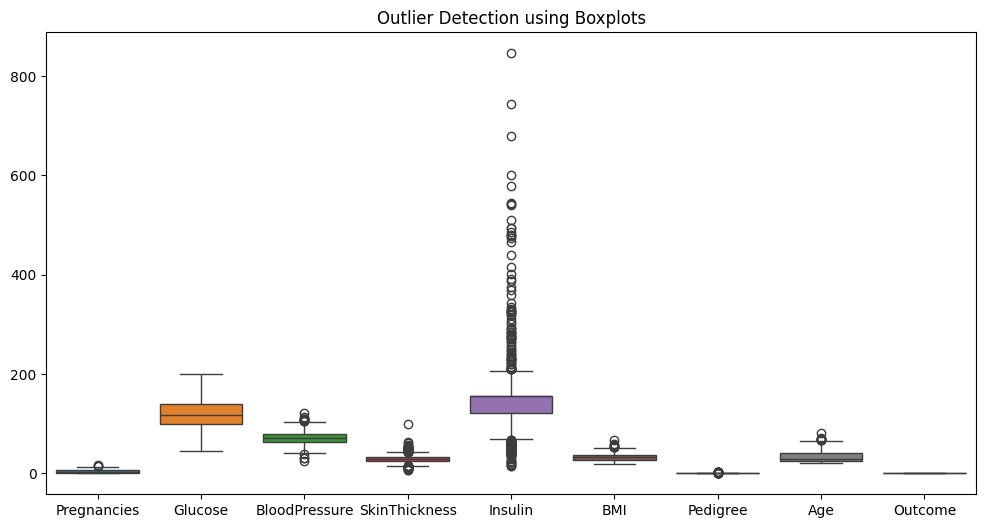


Number of Outliers per Feature:
 Pregnancies        4
Glucose            0
BloodPressure     14
SkinThickness     87
Insulin          159
BMI                8
Pedigree          29
Age                9
Outcome            0
dtype: int64

Confusion Matrix:
 [[88 19]
 [19 28]]
Accuracy Score: 0.7532467532467533
Error Rate: 0.24675324675324672
Precision Score: 0.5957446808510638
Recall Score: 0.5957446808510638
F1 Score: 0.5957446808510638
k=3 --> Accuracy: 0.7272727272727273
k=5 --> Accuracy: 0.7532467532467533
k=7 --> Accuracy: 0.7597402597402597
k=9 --> Accuracy: 0.7532467532467533
k=11 --> Accuracy: 0.7532467532467533


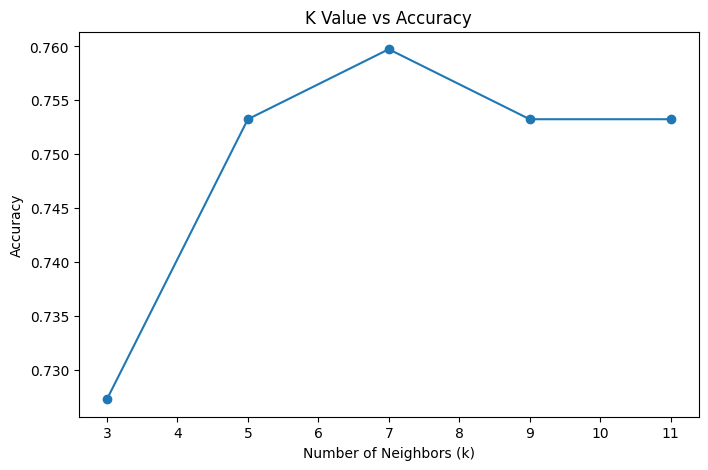

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("path")
print(data.head())

# Check for null or missing values
print("\nMissing values per column:\n", data.isnull().sum())

# Replace zeros with mean for selected columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace=True)

# Features and target
X = data.iloc[:, :8]   # first 8 columns are features
Y = data['Outcome']    # target column

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.title("Outlier Detection using Boxplots")
plt.show()

# Identify outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Display count of outliers per column
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predictions
knn_pred = knn.predict(X_test)

# Metrics
cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
f1 = f1_score(Y_test, knn_pred)

# Print results
print("\nConfusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Error Rate:", error_rate)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

# Test with different k values
accuracy_scores = []
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    accuracy_scores.append(acc)
    print(f"k={k} --> Accuracy: {acc}")

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot([3, 5, 7, 9, 11], accuracy_scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()

1. Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt


Explanation:

numpy → For numerical operations and handling missing values (np.nan).

pandas → For reading and manipulating the dataset.

train_test_split → To split the dataset into training and testing sets.

KNeighborsClassifier → KNN algorithm for classification.

confusion_matrix, accuracy_score, precision_score, recall_score, f1_score → Metrics to evaluate model performance.

seaborn → For visualization (boxplots).

matplotlib.pyplot → Basic plotting library.

2. Load Dataset
data = pd.read_csv("path")
print(data.head())


Explanation:

Reads the CSV file containing diabetes patient data.

data.head() → Shows the first 5 rows to check the dataset.

Dataset columns: Features like Glucose, BloodPressure, BMI, and target column Outcome (1 = diabetes, 0 = no diabetes).

3. Check for Missing Values
print("\nMissing values per column:\n", data.isnull().sum())


Explanation:

Checks if any column has missing (NaN) values.

Ensures data is clean before training.

4. Replace zeros with mean for certain columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in cols_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(round(data[column].mean(skipna=True)), inplace=True)


Explanation:

Some features may have 0 as a placeholder for missing data.

Replace 0 with NaN and then fill missing values with mean of the column.

Ensures better training for KNN, since KNN is sensitive to missing values.

5. Separate Features and Target
X = data.iloc[:, :8]   # first 8 columns are features
Y = data['Outcome']    # target column


Explanation:

X → All feature columns (inputs for prediction).

Y → Target column Outcome (diabetes yes/no).

6. Split Data into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Explanation:

80% training, 20% testing.

random_state=0 → ensures reproducibility.

7. Visualize Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data)
plt.title("Outlier Detection using Boxplots")
plt.show()


Explanation:

Creates boxplots for all features.

Helps identify outliers (values far from the normal range).

8. Detect Outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers per Feature:\n", outliers)


Explanation:

IQR = Q3 - Q1 → Interquartile range.

Data below Q1 - 1.5*IQR or above Q3 + 1.5*IQR → considered outliers.

Counts number of outliers per feature.

9. Initialize and Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


Explanation:

KNeighborsClassifier(n_neighbors=5) → 5 nearest neighbors considered for classification.

fit() → Train the KNN model on training data.

10. Make Predictions
knn_pred = knn.predict(X_test)


Explanation:

Predict diabetes outcome on the test set.

11. Evaluate Model
cm = confusion_matrix(Y_test, knn_pred)
accuracy = accuracy_score(Y_test, knn_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, knn_pred)
recall = recall_score(Y_test, knn_pred)
f1 = f1_score(Y_test, knn_pred)


Explanation:

confusion_matrix → True positives, false positives, true negatives, false negatives.

accuracy_score → Overall correct predictions.

error_rate → Percentage of wrong predictions.

precision → Of predicted positives, how many were correct.

recall → Of actual positives, how many were predicted correctly.

f1_score → Harmonic mean of precision and recall.

12. Print Results
print("\nConfusion Matrix:\n", cm)
print("Accuracy Score:", accuracy)
print("Error Rate:", error_rate)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)


Explanation:

Shows model performance metrics for the test data.

13. Test Different k Values
accuracy_scores = []
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    accuracy_scores.append(acc)
    print(f"k={k} --> Accuracy: {acc}")


Explanation:

Trains KNN with different k values (3, 5, 7, 9, 11).

Records accuracy for each k to find best k.

14. Plot Accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot([3, 5, 7, 9, 11], accuracy_scores, marker='o')
plt.title("K Value vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.show()


Explanation:

Visualizes how accuracy changes with different values of k.

Helps choose the optimal k for KNN model.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
The shapes of the test and train dataset are:
(614, 8) (154, 8) (614,) (154,)
Confusion Matrix: 


C:\Users\Paras\AppData\Local\Temp\ipykernel_20696\2709930741.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '120.89453125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] == 0, col] = mean_value
C:\Users\Paras\AppData\Local\Temp\ipykernel_20696\2709930741.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '69.10546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] == 0, col] = mean_value
C:\Users\Paras\AppData\Local\Temp\ipykernel_20696\2709930741.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[

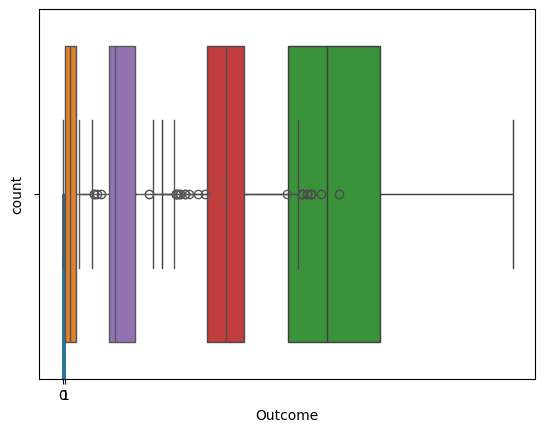

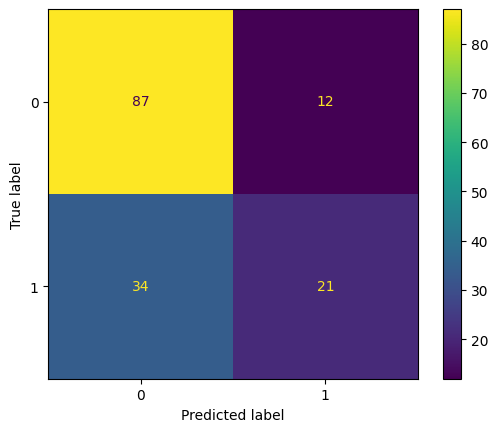

Accuracy: 
Precision: 
Recall: 
Error: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        99
           1       0.64      0.38      0.48        55

    accuracy                           0.70       154
   macro avg       0.68      0.63      0.63       154
weighted avg       0.69      0.70      0.68       154



In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv('path')


data.head()


data.tail()


data.shape


data.columns


data.describe()


cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    mean_value = data[col].mean()
    data.loc[data[col] == 0, col] = mean_value


data.describe()


data.info()


data.isnull().sum()


import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x = data["Outcome"])


sns.boxplot(data = data, x = 'Pregnancies')


sns.boxplot(data = data, x = 'Glucose')


sns.boxplot(data = data, x = 'BloodPressure')


sns.boxplot(data = data, x = 'SkinThickness')


data.corr()


X = data.iloc[:,0:8]
X.shape


Y = data.iloc[:, -1]
Y


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


print("The shapes of the test and train dataset are:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)


model.score(X_test, y_test)


y_pred = model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score


print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()


print("Accuracy: ")
accuracy_score(y_test, y_pred)


print("Precision: ")
precision_score(y_test, y_pred)

print("Recall: ")
recall_score(y_test, y_pred)


print("Error: ")
1-accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


1. Import Libraries
import pandas as pd
import numpy as np


Explanation:

pandas → For data loading and manipulation.

numpy → For numerical operations like replacing zeros.

2. Load Dataset
data = pd.read_csv('C:/Users/Paras/Downloads/diabetes.csv')
data.head()
data.tail()
data.shape
data.columns
data.describe()


Explanation:

read_csv → Load CSV file into a DataFrame.

head() → Shows first 5 rows.

tail() → Shows last 5 rows.

shape → Shows number of rows and columns.

columns → List of all column names.

describe() → Basic statistics for each column (mean, min, max, quartiles).

3. Replace zeros in certain columns with mean
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_replace:
    mean_value = data[col].mean()
    data.loc[data[col] == 0, col] = mean_value


Explanation:

Some columns have 0 as missing value placeholder.

Replace 0 with the mean of the column to clean the data.

4. Check data after replacement
data.describe()
data.info()
data.isnull().sum()


Explanation:

describe() → Updated statistics after replacing zeros.

info() → Shows data types and non-null counts.

isnull().sum() → Ensures there are no missing values left.

5. Visualize data
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = data["Outcome"])
sns.boxplot(data = data, x = 'Pregnancies')
sns.boxplot(data = data, x = 'Glucose')
sns.boxplot(data = data, x = 'BloodPressure')
sns.boxplot(data = data, x = 'SkinThickness')


Explanation:

countplot → Shows number of patients with diabetes (Outcome = 1) vs no diabetes (Outcome = 0).

boxplot → Shows spread of each feature and detects outliers visually.

6. Check correlation
data.corr()


Explanation:

Computes correlation between features and target.

Helps understand which features may influence diabetes outcome.

7. Select Features and Target
X = data.iloc[:,0:8]
Y = data.iloc[:, -1]
X.shape
Y


Explanation:

X → First 8 columns are features.

Y → Last column (Outcome) is target.

8. Split Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print("The shapes of the test and train dataset are:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Explanation:

80% training, 20% testing.

random_state=42 → Ensures reproducibility.

9. Train KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)


Explanation:

KNN classifier with k=2 (2 nearest neighbors).

fit() → Train model on training data.

10. Test Model
model.score(X_test, y_test)
y_pred = model.predict(X_test)


Explanation:

score() → Returns accuracy of the model.

predict() → Makes predictions on test set.

11. Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()


Explanation:

confusion_matrix → Shows counts of TN, FP, FN, TP.

ConfusionMatrixDisplay → Plots the confusion matrix.

12. Compute metrics
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
1-accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)


Explanation:

accuracy_score → Overall correct predictions.

precision_score → Correct positive predictions / all predicted positives.

recall_score → Correct positive predictions / all actual positives.

1 - accuracy → Error rate.

classification_report → Summarizes precision, recall, F1-score for both classes.